In [160]:
import hdf5storage
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from analysis_util import *
from sklearn.model_selection import train_test_split
from sklearn import metrics


import seaborn as sns
'''this script test the hypothesis whether people respond to a fixed bound
pepole  '''
# global setting f
plt.rcParams.update({"font.size": 18})
colors = sns.color_palette("deep")
sns.set(style="whitegrid")
# top level dir 
# 


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


PROJECT_DIR = "/data/rwchain-all/round2"
BEH_DIR = os.path.join(PROJECT_DIR, "rwchain-beh/data")
EEG_DIR = os.path.join(PROJECT_DIR, "rwchain-eeg")
ALL_BEH_DIR = os.path.join(PROJECT_DIR, 'rwchain-beh', 'combined')


list_of_subj = os.listdir(BEH_DIR)
list_of_subj.sort()
# list_of_subj = [list_of_subj[5]]

df = pd.read_pickle(os.path.join(ALL_BEH_DIR, 'all_df_concat.pkl'))
# organize some columsn
 
df['key'][df['key'] == '[5]'] = 1
df['key'][df['key'] == '[3]'] = 1
df['key'][df['key'] == '[2]'] = 0
df['cumsum'] = df['sequence_clean'].apply(lambda x: [sum(x[:i+1]) for i in range(len(x))])

# get rid of a ;pw acc subject
df = df[df['sid']!='s108']


# df = df[df['stimDur'] != 0.5]
# df = df[df['stimDur'] != 0.05]
df = df[df['stimDur'] == 0.25]


# correct the count
df = correct_samples_by_condition(df)

cumsum = np.array(df['cumsum'].to_list())
sequence =  np.array(df['sequence_clean'].to_list())
count = df['count_corrected'].to_numpy()

/tmp/ipykernel_528867/2433605299.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[5]'] = 1
/tmp/ipykernel_528867/2433605299.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[3]'] = 1
/tmp/ipykernel_528867/2433605299.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[2]'] = 0


In [161]:
df.head()


,time,bytetime,press,count,key,stimDur,Bias,sequence,block,sequence_clean,sid,cumsum,count_corrected
0,2.6166679859161377,2611,[1],10,0,0.25,0.12,[-1. 1. -1. 1. -1. 1. -1. -1. -1. -1. -1. ...,0,"[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, ...",s102,"[-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -2.0, ...",9
1,2.2499890327453613,2233,[1],8,1,0.25,0.12,[-1. -1. -1. 1. 1. 1. 1. 1. -1. -1. -1. -...,0,"[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1...",s102,"[-1.0, -2.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, ...",7
2,2.1333320140838623,2118,[1],8,0,0.25,0.12,[ 1. -1. -1. -1. 1. 1. -1. -1. -1. -1. 1. ...,0,"[1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, ...",s102,"[1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -1.0, -2.0, ...",7
3,1.2833738327026367,1270,[1],5,1,0.25,0.12,[ 1. 1. 1. 1. -1. 1. 1. -1. -1. -1. 1. -...,0,"[1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1....",s102,"[1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ...",4
4,2.3333139419555664,2318,[1],9,1,0.25,0.12,[-1. 1. -1. 1. 1. -1. 1. 1. 1. -1. -1. -...,0,"[-1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1....",s102,"[-1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0...",8


In [162]:
# create a matrix of +1 and -1 with NaNs if the chain terminates

chain_matrix = get_chain_matrix(sequence, count)


In [163]:

# # calculate terminated chains
# cumsum_stop_list = []

# for c in range(cumsum.shape[0]):
#     cumsum_stop = cumsum[
#         c, : int(count[c])
#     ]  # for example, if rt adjusted i 708, for 250ms, one have seen 3 stimulus.
#     cumsum_stop_list.append(cumsum_stop)
 



In [164]:
dataset, dataset_resp = make_dataset(4, count, chain_matrix)
evidence = get_abs_evidence(dataset)

In [165]:
x_t = get_abs_evidence(dataset[dataset_resp])
x_c =  get_abs_evidence(dataset[~dataset_resp])

In [166]:

from sklearn.decomposition import PCA

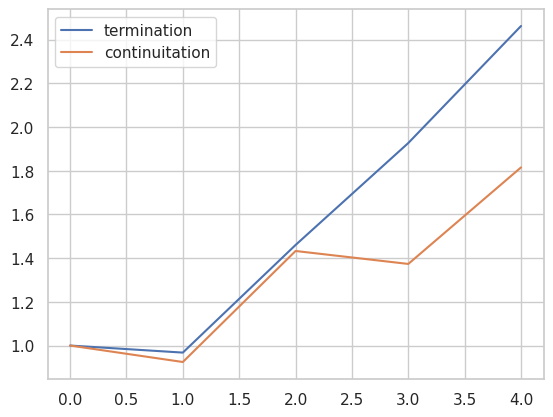

In [167]:
plt.plot(np.mean(x_t,axis=0), label = 'termination')
plt.plot(np.mean(x_c,axis=0), label = 'continuitation')
plt.legend()


In [168]:
x_t

array([[1., 2., 3., 4., 3.],
       [1., 0., 1., 2., 3.],
       [1., 0., 1., 2., 3.],
       ...,
       [1., 0., 1., 2., 1.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])

In [169]:
pca_t = PCA(n_components=4)
x_t_pca = pca_t.fit_transform(x_t.T)

In [170]:
pca_c = PCA(n_components=4)
x_c_pca = pca_c.fit_transform(x_c.T)

In [171]:
pca_t.explained_variance_ratio_

array([0.71819019, 0.12560006, 0.09697654, 0.05923322])

In [172]:
pca_c.explained_variance_ratio_


array([0.55299778, 0.19229079, 0.15280331, 0.10190812])

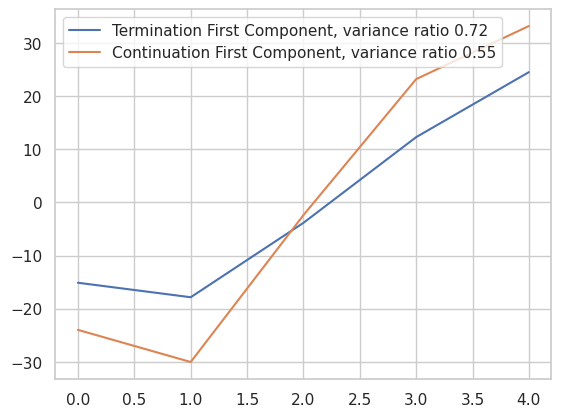

In [173]:
num_of_component = 0
plt.plot(x_t_pca[:,num_of_component],label = f'Termination First Component, variance ratio {np.round(pca_t.explained_variance_ratio_[num_of_component],2)}')
plt.plot(x_c_pca[:,num_of_component], label = f'Continuation First Component, variance ratio {np.round(pca_c.explained_variance_ratio_[num_of_component],2)}')
plt.legend()

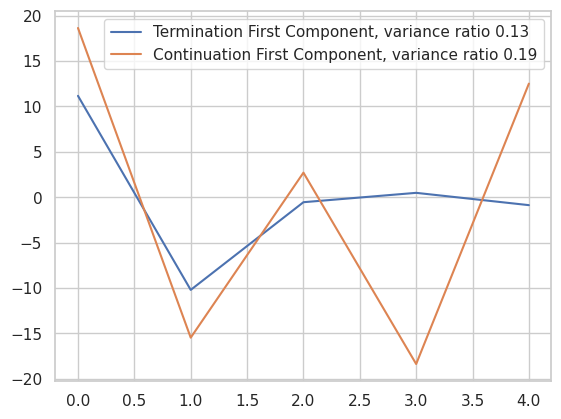

In [174]:
num_of_component = 1
plt.plot(x_t_pca[:,num_of_component],label = f'Termination First Component, variance ratio {np.round(pca_t.explained_variance_ratio_[num_of_component],2)}')
plt.plot(x_c_pca[:,num_of_component], label = f'Continuation First Component, variance ratio {np.round(pca_c.explained_variance_ratio_[num_of_component],2)}')
plt.legend()

In [175]:
ind = evidence[:,-1]==1

In [176]:
dataset.shape

(2457, 5)

In [177]:
resp_ind = dataset_resp[ind]

In [178]:
stopped = dataset[ind,:][resp_ind]
continued = dataset[ind,:][~resp_ind]

In [179]:
evidence_stop = evidence[ind,:][resp_ind]
evidence_continued = evidence[ind,:][~resp_ind]

In [180]:
evidence_stop.shape

(173, 5)

In [181]:
evidence_continued

array([[1., 0., 1., 0., 1.],
       [1., 2., 3., 2., 1.],
       [1., 0., 1., 2., 1.],
       ...,
       [1., 2., 1., 2., 1.],
       [1., 0., 1., 0., 1.],
       [1., 2., 1., 0., 1.]])

In [182]:
nbin = evidence_continued.shape[1]

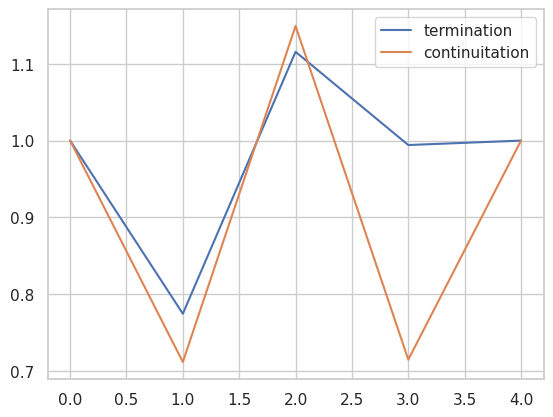

In [183]:
plt.plot(np.mean(evidence_stop,axis=0), label = 'termination')
plt.plot(np.mean(evidence_continued,axis=0), label = 'continuitation')
plt.legend()


In [184]:
stopped[0:3]

array([[ 1., -1.,  1.,  1., -1.],
       [-1.,  1., -1., -1.,  1.],
       [-1., -1.,  1., -1.,  1.]])

In [185]:
nbin

5

(array([74., 74., 66., 46., 86.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

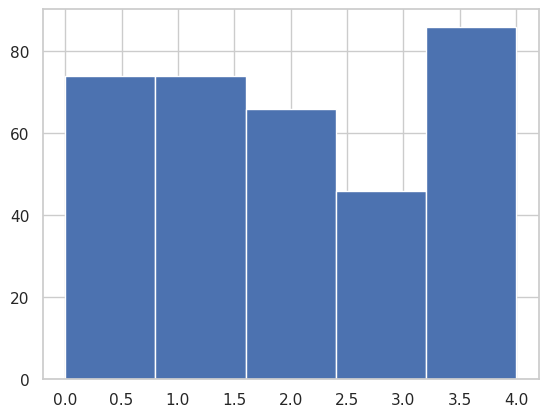

In [186]:
from collections import Counter

def dip_pos(x_array):
    ind_list = []
    for i in range(len(x_array)):
        chain = x_array[i,:]
        most_common_element = Counter(x_array[i,:]).most_common(1)[0][0]
        for ind, value in enumerate(chain):
            if value != most_common_element:
                ind_list.append(ind)
    return ind_list
        
        

# plotting the first time that the value is not the most common sign

ind = dip_pos(stopped)
ind_continued = dip_pos(continued)
plt.hist(ind, bins = nbin)


In [187]:
stopped.shape

(173, 5)

(array([550., 541., 524., 499., 460.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

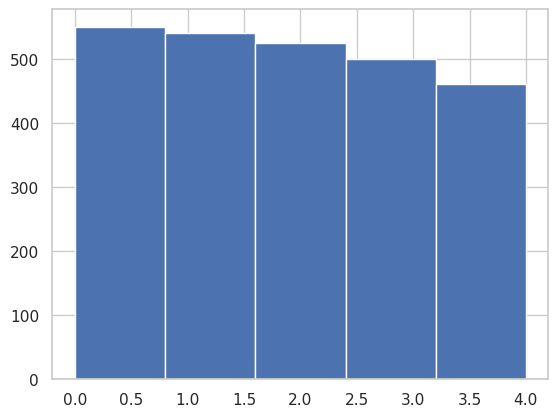

In [188]:

plt.hist(ind_continued,bins=nbin)